<div style="text-align:center;">
<span style="color:purple;font-size:25px">PROBLEM STATEMENT</span>



<span style="color:Purple">The "Online Shoppers Intention" dataset from Machine Learning refers to a collection of data that is used to predict the intention of online shoppers. It provides information about the browsing behavior and characteristics of visitors to an e-commerce website, along with their final purchase decision.</span>

1)<span style="color:Orange;">**Administrative, Informational, and Product-Related Pageviews**:</span> The number of times a visitor views administrative, informational, and product-related pages of the website.

2)<span style="color:Orange;">**Exit Rate**:</span> The percentage of visitors who leave the website after viewing a particular page.

3)<span style="color:Orange;">**Bounce Rate**:</span> The percentage of visitors who leave the website immediately after landing on a particular page.

4)<span style="color:Orange;">**Page Value**:</span> The average value of the pages viewed by a visitor before making a purchase.

5)<span style="color:Orange;">**Special Day**:</span> Indicates the closeness of the visit to a special day (e.g., Mother's Day, Valentine's Day).

6)<span style="color:Orange;">**Month, Operating System, Browser, Region, Traffic Type**:</span> Information about the visitor's operating system, browser, region, and the type of traffic source.

7)<span style="color:Orange;">**Visitor Type**:</span> Whether the visitor is a returning visitor or a new visitor.

8)<span style="color:Orange;">**Weekend**:</span> Indicates whether the visit occurred on a weekend or not.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
df.shape

(12330, 18)

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2.0,NaN,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12329 non-null  float64
 5   ProductRelated_Duration  12315 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12318 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<span style="color:purple;font-size:20px">Dealing with Missing values</span>


In [7]:
df.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              1
ProductRelated_Duration    15
BounceRates                14
ExitRates                  14
PageValues                 12
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [8]:
med1= df["ProductRelated_Duration"].median()
med2= df["BounceRates"].median()
med3= df["ExitRates"].median()
med4= df["PageValues"].median()
med5= df["ProductRelated"].median()

In [9]:
df["ProductRelated_Duration"] = df["ProductRelated_Duration"].replace(np.NaN,med1)
df["BounceRates"] = df["BounceRates"].replace(np.NaN,med2)
df["ExitRates"] = df["ExitRates"].replace(np.NaN,med3)
df["PageValues"] = df["PageValues"].replace(np.NaN,med4)
df["ProductRelated"] = df["ProductRelated"].replace(np.NaN,med5)



In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

 <span style="color:purple;font-size:25px">Data Visualization</span>


In [11]:
revenue_counts = df["Revenue"].value_counts().reset_index()
fig = px.bar(revenue_counts, x="index", y="Revenue", 
             color="index", 
             labels={'index': 'Revenue', 'Revenue': 'Count'},
             )
fig.show()

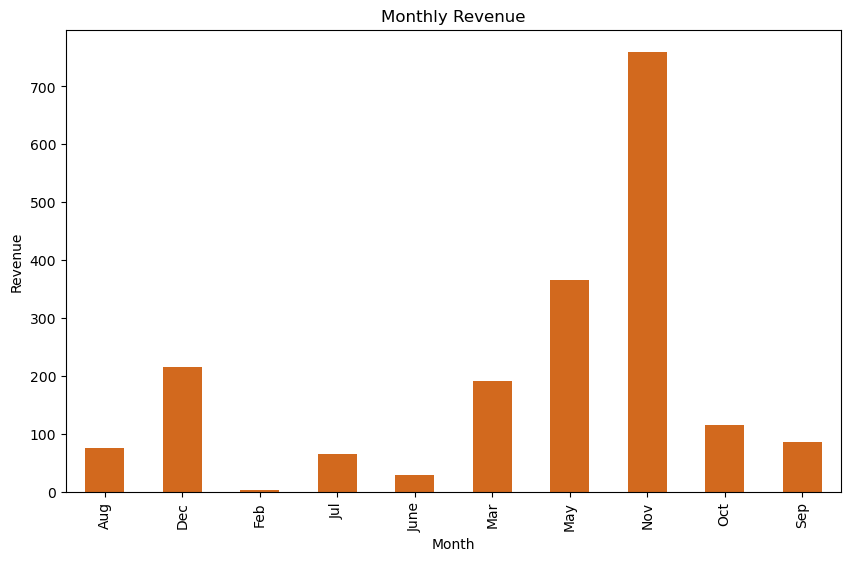

In [12]:
import matplotlib.pyplot as plt

# Grouping data by month and calculating total revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='#D2691E')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.show()


This bar chart visualizes the monthly revenue generated by the e-commerce website. It can help identify seasonal patterns or months with higher or lower revenue, allowing businesses to plan marketing campaigns or allocate resources accordingly

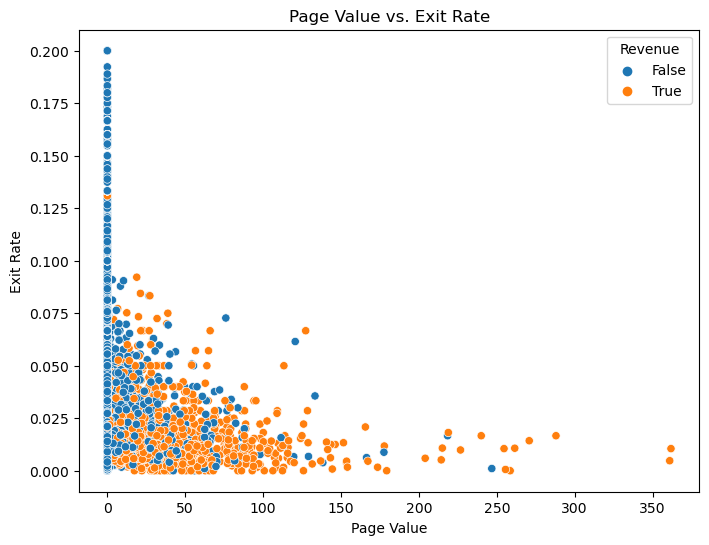

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PageValues', y='ExitRates', hue='Revenue', data=df)
plt.xlabel('Page Value')
plt.ylabel('Exit Rate')
plt.title('Page Value vs. Exit Rate')
plt.show()

This scatter plot displays the relationship between page value (average value of pages viewed by a visitor) and exit rate. It can help identify whether pages with higher page values have lower exit rates, indicating a stronger engagement and potential conversion opportunity

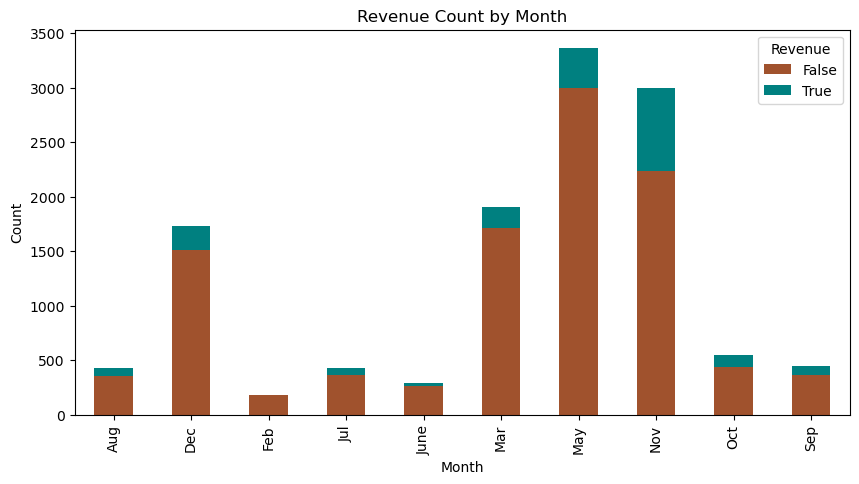

In [14]:
grouped_data = df.groupby('Month')['Revenue'].value_counts().unstack('Revenue')
# Define custom colors
colors = ['#A0522D', '#008080']

# Create the stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 5), color=colors)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Revenue Count by Month')

# Display the plot
plt.show()

By examining the stacked bar plot, we can draw insights into seasonal variations, identify months with higher or lower conversion rates, and assess the effectiveness of marketing or promotional strategies during specific periods. It also helps in understanding customer behavior and potential factors influencing revenue generation over time.

In [15]:
conversion_rate = df.groupby('Month')['Revenue'].mean().reset_index()
fig = px.line(conversion_rate, x='Month', y='Revenue', markers=True, line_shape='linear', 
              title='Conversion Rate Over Time', labels={'Revenue': 'Conversion Rate'})
fig.update_traces(line=dict(color='brown'))
fig.show()


This line plot displays the conversion rate (average revenue per visitor) over time. It allows businesses to identify trends and patterns in the conversion rate, helping them understand the effectiveness of their marketing and sales efforts.

<Axes: xlabel='Weekend'>

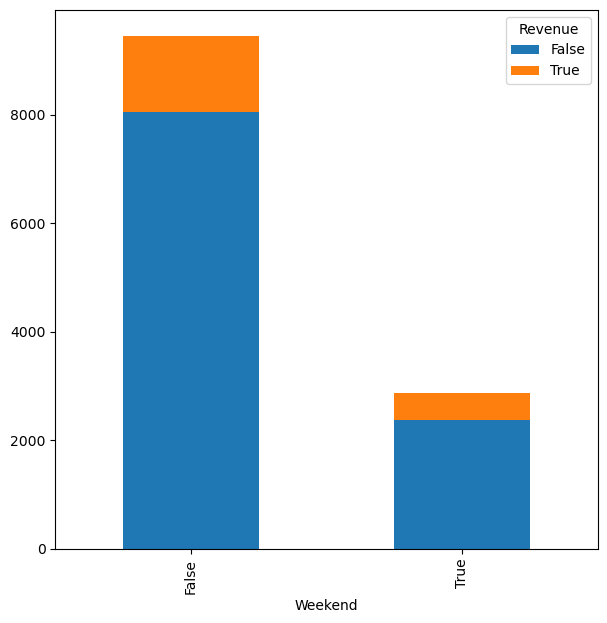

In [16]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

In [17]:
colors = ['#8B4513', '#CD853F', '#228B22']
visitor_type_counts = df['VisitorType'].value_counts()
fig = px.pie(values=visitor_type_counts, names=visitor_type_counts.index, color_discrete_sequence=colors)
fig.update_layout(title="Visitor Types")
fig.show()

This pie chart represents the distribution of visitor types (new vs. returning visitors). It provides insights into the proportion of new and returning visitors to the website, which can help tailor marketing strategies and improve customer retention initiatives.

<Axes: >

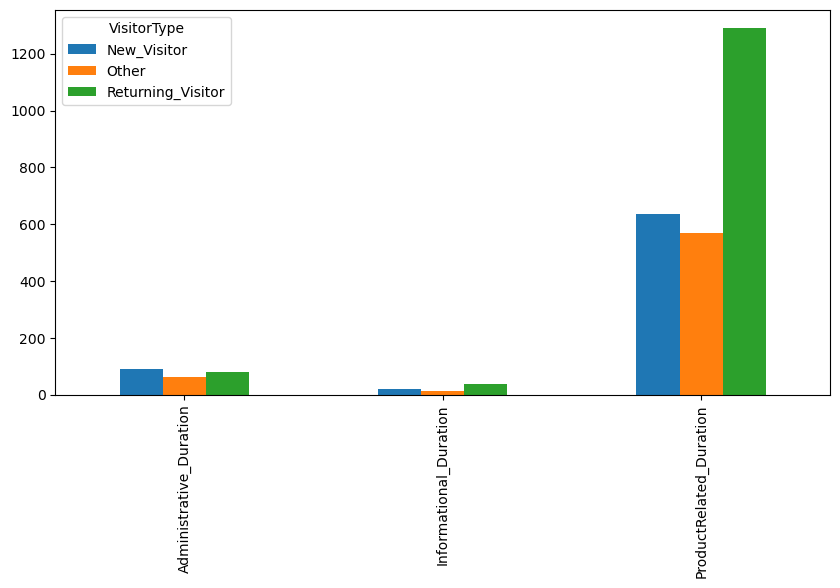

In [18]:
df_pvt=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

The above plot shows that the visitor spent more time in the ProductRelated_pages

In [19]:
import plotly.express as px

grouped_data = df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').reset_index()

bar_chart_revenue_month = px.bar(grouped_data, x='Month', y=[0, 1], barmode='stack', 
                                 title='Revenue Count by Month', labels={'0': 'No Purchase', '1': 'Purchase'},
                                 color_discrete_sequence=['red', 'green'])

bar_chart_revenue_month.show()


This bar chart displays the count of visitors who made a purchase (green bars) and those who did not make a purchase (red bars) for each month. The chart allows us to compare the number of purchases and non-purchases on a monthly basis. It can reveal patterns such as seasonal variations in purchasing behavior, identify months with higher sales conversion rates, and aid in understanding the effectiveness of marketing efforts and promotions.

In [20]:
import plotly.express as px

pie_chart_donut = px.pie(df, names='VisitorType', title='Visitor Type Proportions',hole=0.4, color_discrete_sequence=px.colors.qualitative.Set2)

pie_chart_donut.show()


This donut-style pie chart shows the proportion of different visitor types (new visitors, returning visitors, and others). The central hole (hole=0.4) in the donut chart style creates a visually appealing representation. Analyzing this chart can provide insights into customer loyalty and retention. A larger "donut" for returning visitors suggests a strong customer base, while a higher proportion of new visitors might indicate effective marketing strategies in attracting new customers.

In [21]:


scatter_plot_product_admin = px.scatter(df, x='ProductRelated_Duration', y='Administrative_Duration', 
                                        title='Product-Related Duration vs. Administrative Duration',
                                        color='Revenue', color_continuous_scale='Viridis')

scatter_plot_product_admin.show()


This scatter plot shows the relationship between the duration spent on product-related pages and administrative pages. The points are colored based on revenue (green for purchases, blue for non-purchases). Analyzing this plot can reveal if there are correlations between the time spent on specific page types and the likelihood of making a purchase. For instance, clusters of green points in certain regions might indicate that visitors who spend more time on product-related pages are more likely to make a purchase.

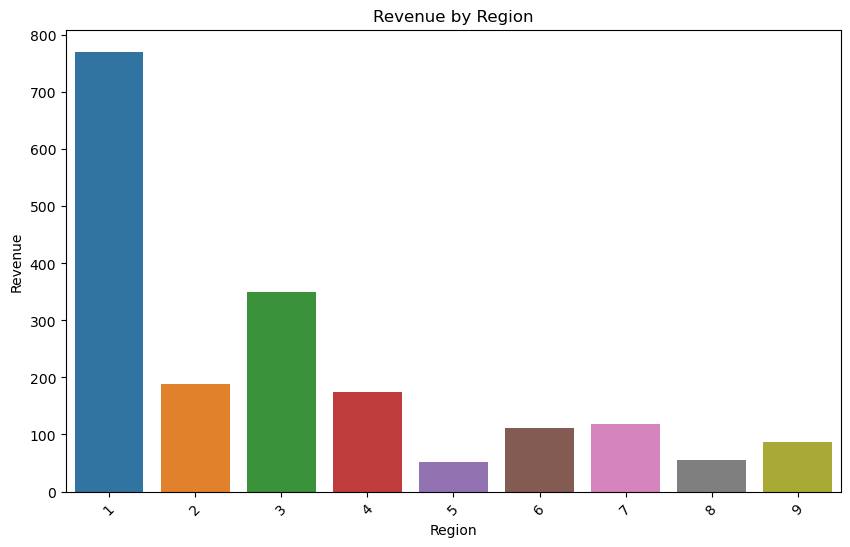

In [22]:
# Grouping data by region and calculating total revenue
revenue_by_region = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values)
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('Revenue by Region')
plt.xticks(rotation=45)
plt.show()


This bar chart illustrates the revenue generated by different regions. It provides insights into the regions that contribute the most to the overall revenue, helping businesses identify potential target markets and allocate resources accordingly.

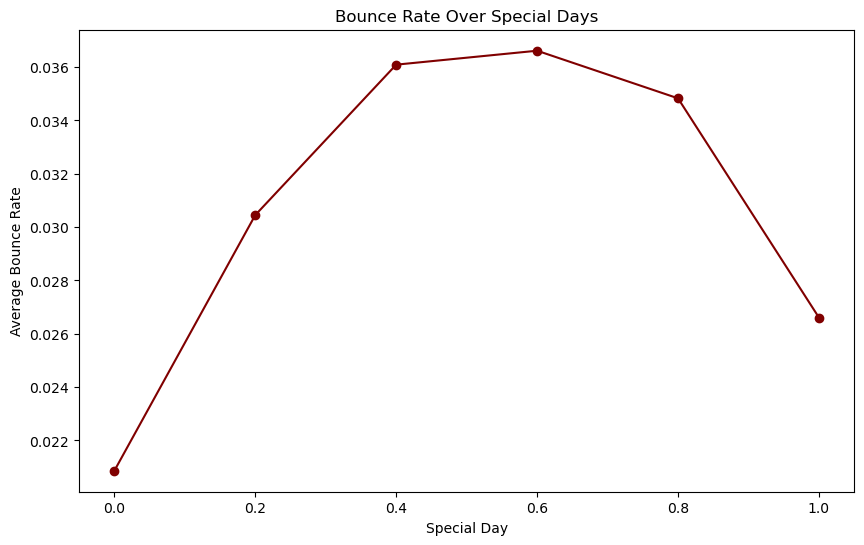

In [23]:
# Grouping data by special day and calculating average bounce rate
avg_bounce_rate = df.groupby('SpecialDay')['BounceRates'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
avg_bounce_rate.plot(kind='line', marker='o',color = "maroon")
plt.xlabel('Special Day')
plt.ylabel('Average Bounce Rate')
plt.title('Bounce Rate Over Special Days')
plt.show()


This line plot shows the trend of the average bounce rate (percentage of visitors who leave the website immediately) over special days. It can help identify whether special days have an impact on visitor engagement and potential reasons for higher or lower bounce rates during specific occasions

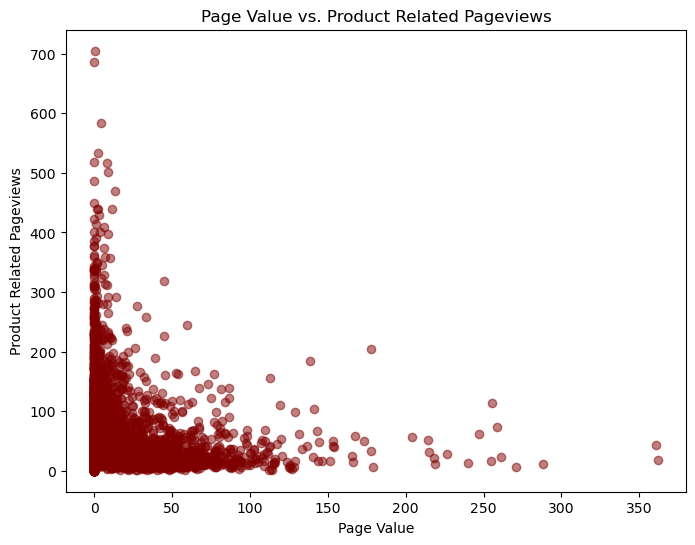

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PageValues'], df['ProductRelated'], alpha=0.5, color='maroon')
plt.xlabel('Page Value')
plt.ylabel('Product Related Pageviews')
plt.title('Page Value vs. Product Related Pageviews')
plt.show()


This scatter plot shows the relationship between page value and the number of product-related pageviews. It helps identify whether pages with higher page values are associated with higher engagement and interest in product-related content.

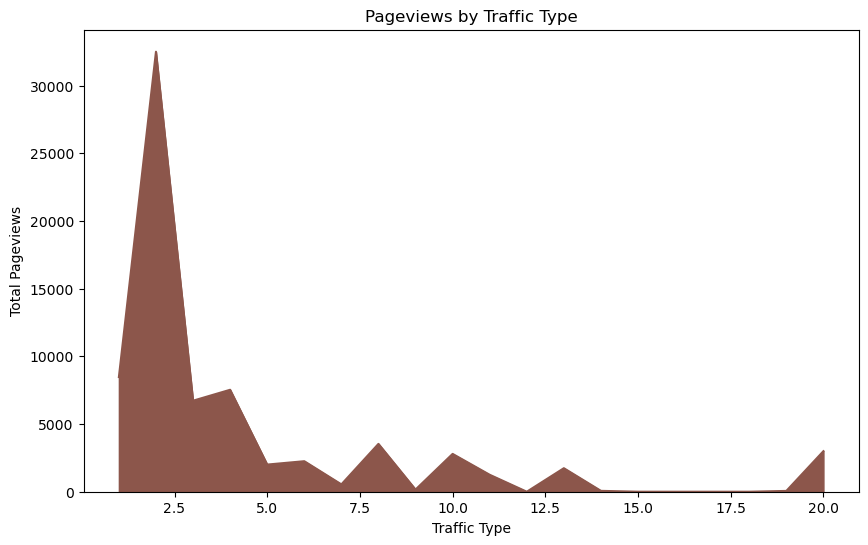

In [25]:
pageviews_by_traffic = df.groupby('TrafficType')['PageValues'].sum()

# Define custom colors
colors = ['#8c564b']

# Plotting the stacked area chart
plt.figure(figsize=(10, 6))
pageviews_by_traffic.plot(kind='area', stacked=True, color=colors)
plt.xlabel('Traffic Type')
plt.ylabel('Total Pageviews')
plt.title('Pageviews by Traffic Type')
plt.show()

This stacked area chart visualizes the total pageviews for different traffic types. It helps understand the contribution of each traffic type to the overall pageviews, assisting businesses in evaluating the effectiveness of different traffic sources

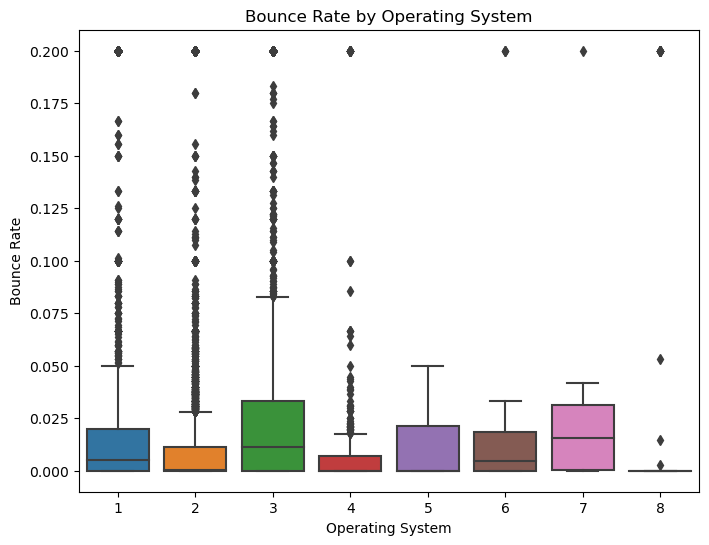

In [26]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='OperatingSystems', y='BounceRates', data=df)
plt.xlabel('Operating System')
plt.ylabel('Bounce Rate')
plt.title('Bounce Rate by Operating System')
plt.show()


This box plot displays the distribution of bounce rates for different operating systems. It allows businesses to compare the bounce rates across various operating systems and identify potential differences in user experience or website compatibility.

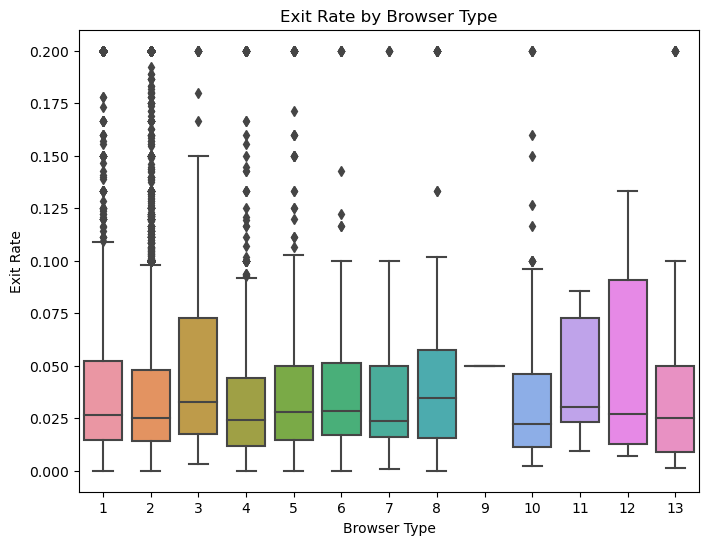

In [27]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Browser', y='ExitRates', data=df)
plt.xlabel('Browser Type')
plt.ylabel('Exit Rate')
plt.title('Exit Rate by Browser Type')
plt.show()


 This box plot visualizes the distribution of exit rates across different browser types. It allows businesses to compare the exit rates and identify any variations or anomalies associated with specific browsers.

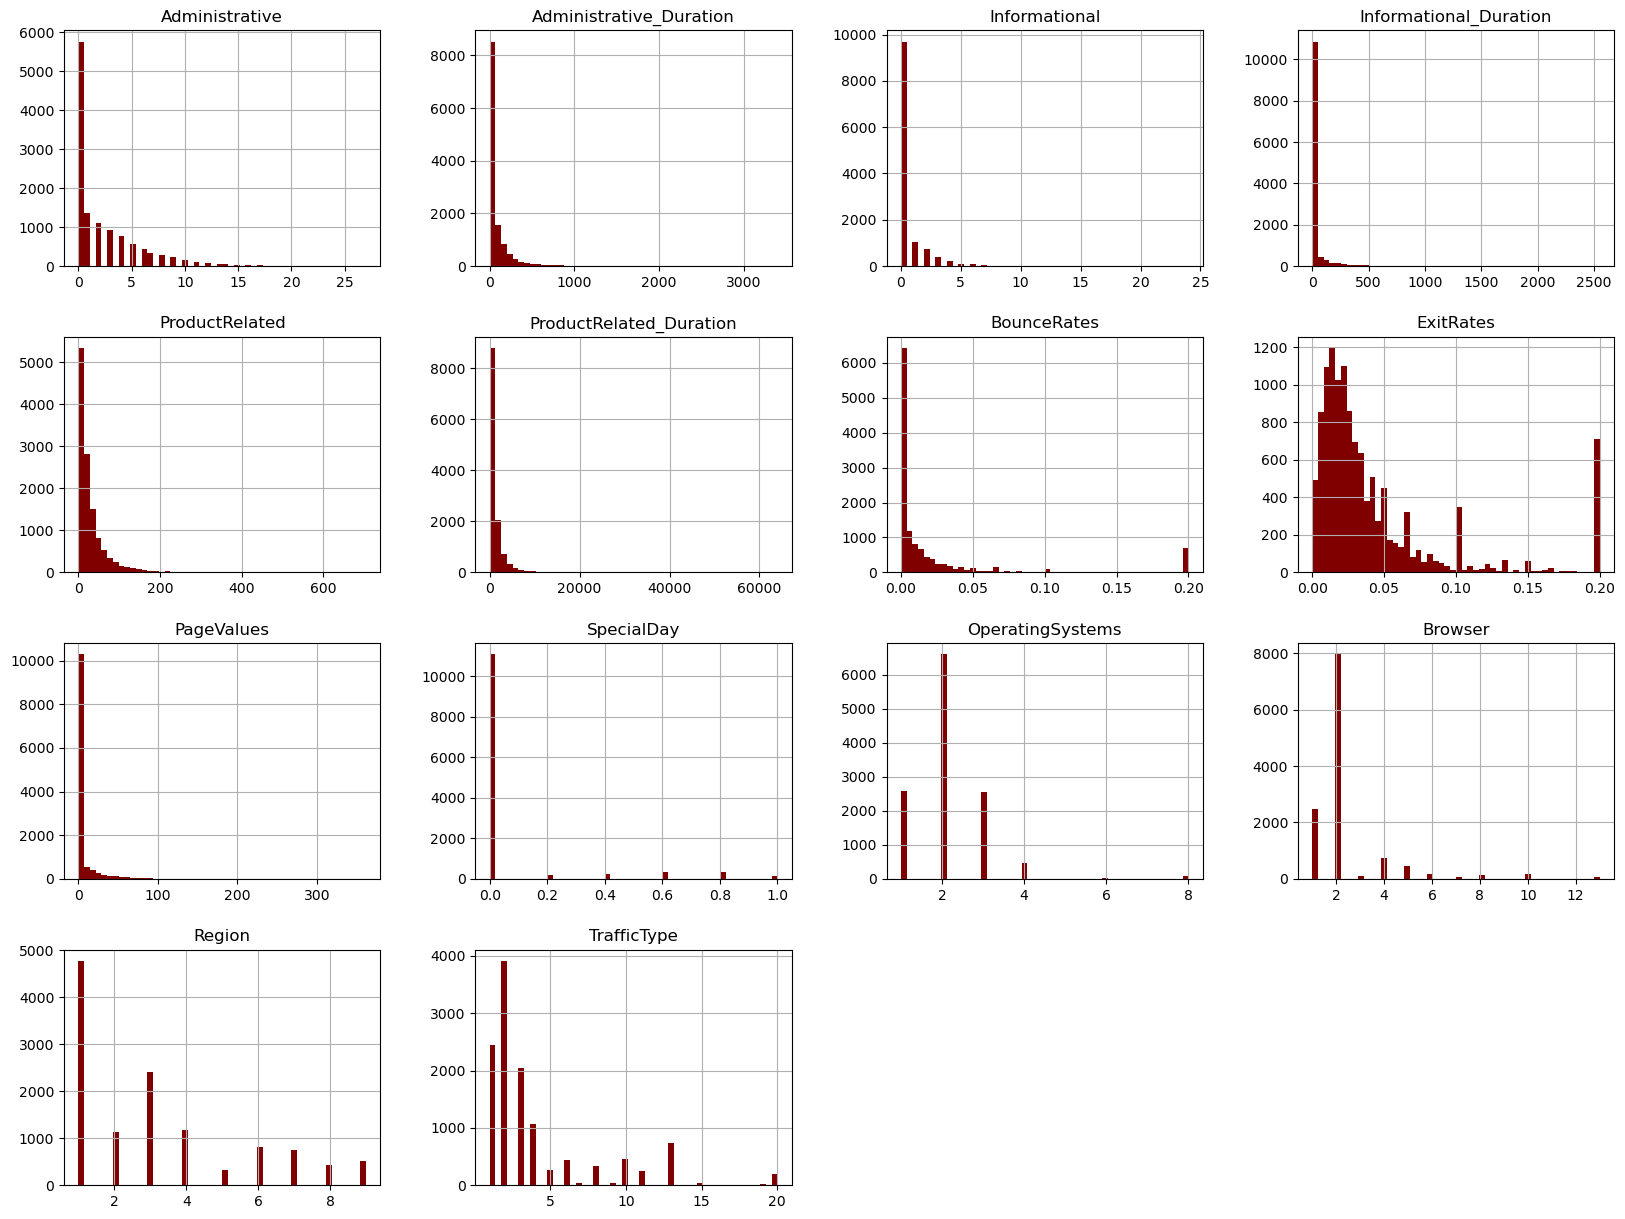

In [28]:
df.hist(bins=50, figsize=(20,15),color ="maroon")
plt.show()

**Observation 1**

1. Data is not distributed evenly.
2. Revenue is less on weekend.
3. Revenue is more in Nov month.

# Data Cleaning and Standardization

In [29]:

Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

<Axes: >

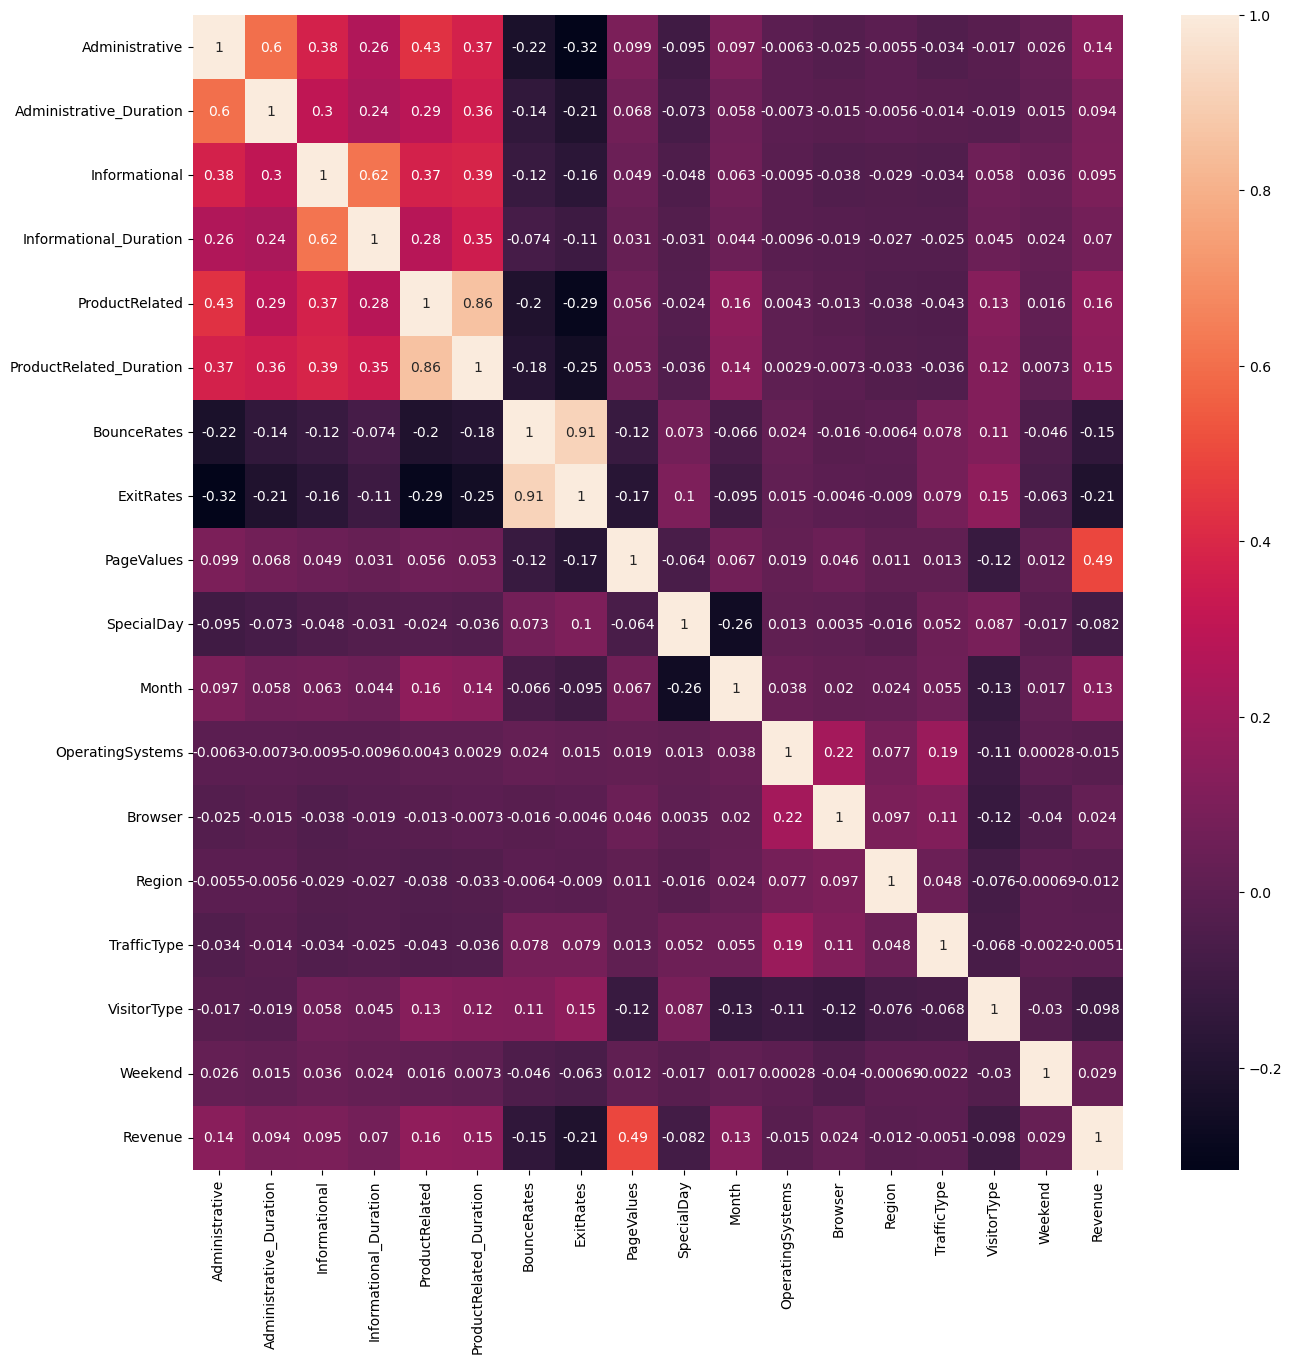

In [30]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

**Observation 2**

1. We don't have much correlation.
2. Only BounceRate and ExitRate has good correlation.

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

# Assuming you have loaded your dataset into pandas DataFrame 'data'
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(sampling_strategy='not majority')
X_res, y_res = ros.fit_resample(X, y)

# Convert the balanced dataset back to a DataFrame
balanced_data = pd.DataFrame(X_res, columns=X.columns)
balanced_data['Revenue'] = y_res

# Min-Max scaling (Normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(balanced_data.drop('Revenue', axis=1))

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_scaled, balanced_data['Revenue'])

# Feature selection using SelectFromModel
feature_selector = SelectFromModel(rf_classifier, prefit=True)
X_selected = feature_selector.transform(X_scaled)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Print the selected feature names
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues',
       'Month'],
      dtype='object')


# Model_Building

In [32]:
ros = RandomOverSampler(sampling_strategy='not majority')
X_res, y_res = ros.fit_resample(X, y)
balanced_data = pd.DataFrame(X_res, columns=X.columns)
balanced_data['Revenue'] = y_res

revenue_counts = balanced_data["Revenue"].value_counts().reset_index()
fig = px.bar(revenue_counts, x="index", y="Revenue", 
             color="index", 
             labels={'index': 'Revenue', 'Revenue': 'Count'},
             )
fig.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_selected, balanced_data['Revenue'], test_size=0.3, random_state=0) 

# K Nearest Neighbor

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model_1 = KNeighborsClassifier(n_neighbors=4)
model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [36]:
model_1.score(x_train,y_train)

0.9451679232350926

In [37]:
model_1.score(x_test,y_test)

0.8946274384393987

# LogisticRegression


In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
model_2 = LogisticRegression()
model_2.fit(x_train,y_train)

LogisticRegression()

In [40]:
model_2.score(x_train,y_train)

0.8048663468128855

In [41]:
model_2.score(x_test,y_test)

0.7999680204669012

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier


In [43]:
model_3 = DecisionTreeClassifier(max_depth=3)
model_3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
model_3.score(x_train,y_train)

0.8449623029472241

In [45]:
model_3.score(x_test,y_test)

0.843620083146786

# AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
model_4 = AdaBoostClassifier()
model_4.fit(x_train,y_train)

AdaBoostClassifier()

In [48]:
model_4.score(x_train,y_train)

0.8453735435229609

In [49]:
model_4.score(x_test,y_test)

0.8431403901503038

In [50]:
y_pred = model_4.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.84
Precision: 0.87
Recall: 0.80
F1-score: 0.84


# ROC Curve

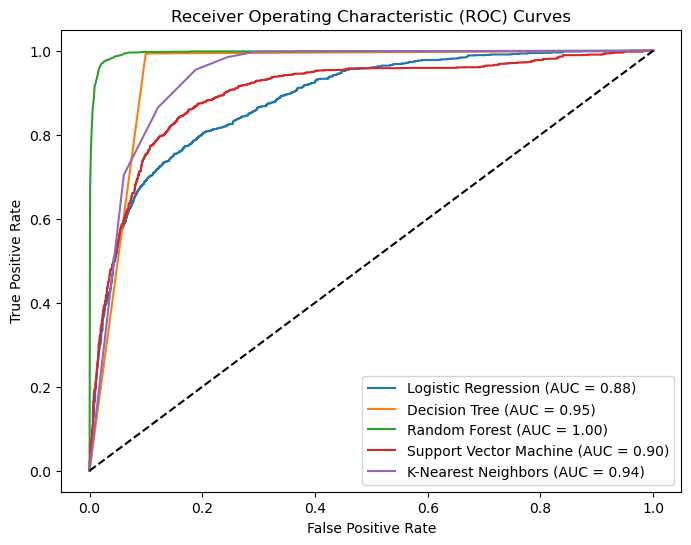

In [51]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_preds = logreg_model.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_probs = logreg_model.predict_proba(x_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_probs = dt_model.predict_proba(x_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_probs = rf_model.predict_proba(x_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
svm_preds = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_probs = svm_model.predict_proba(x_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_preds = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_probs = knn_model.predict_proba(x_test)[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (AUC = {:.2f})'.format(svm_auc))
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

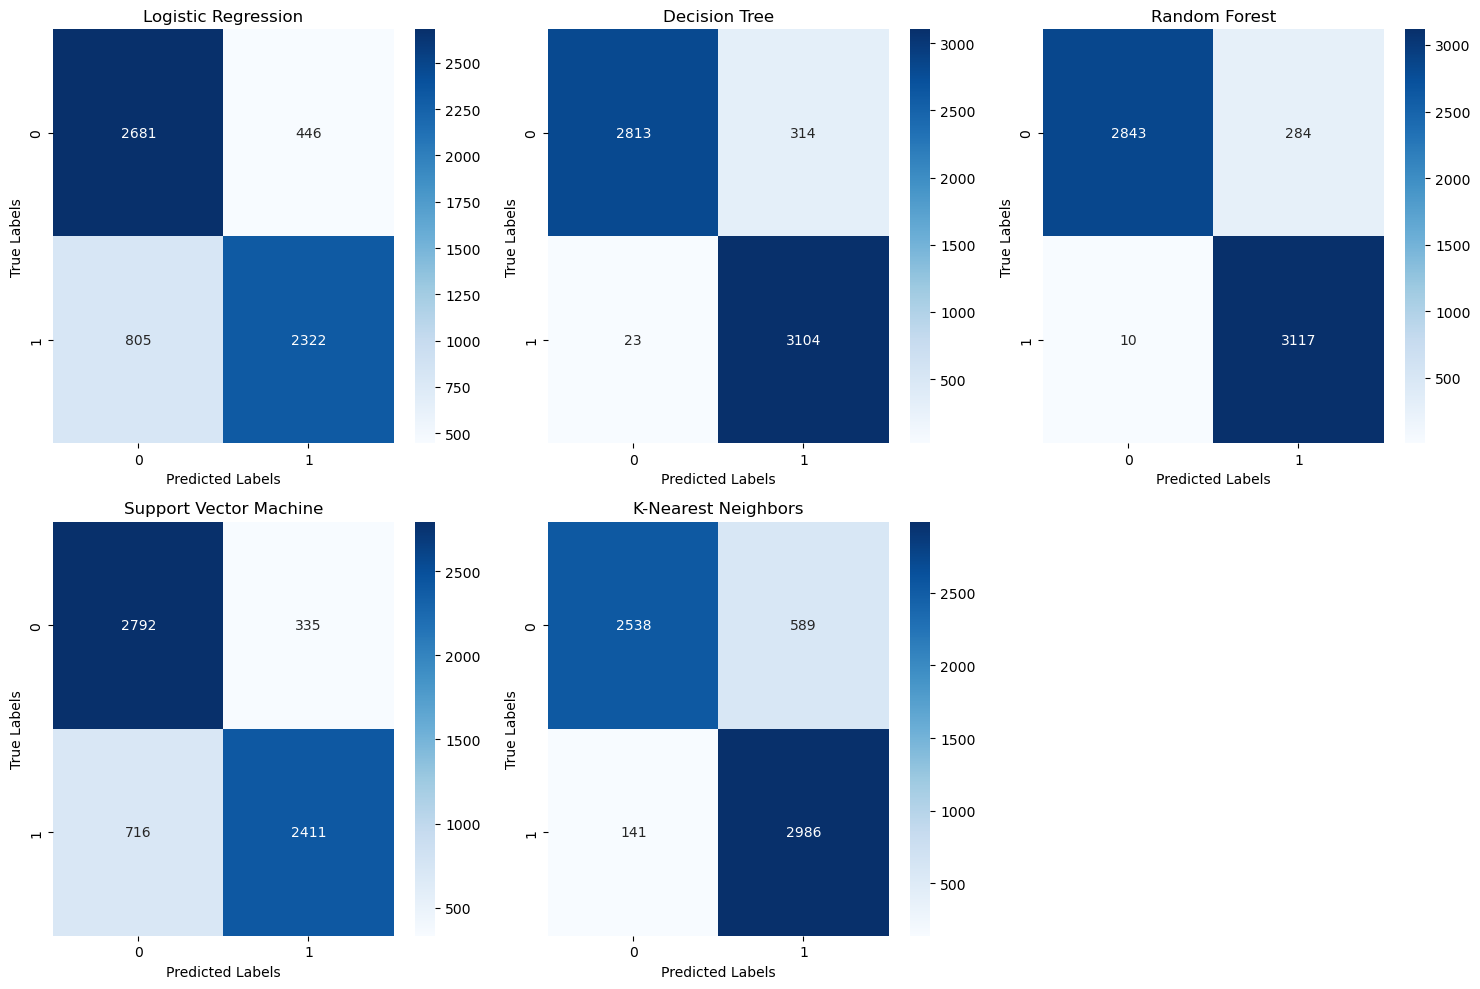

In [52]:
from sklearn.metrics import confusion_matrix
# Confusion matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg_preds)

# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_preds)

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)

# Confusion matrix for Support Vector Machine
svm_cm = confusion_matrix(y_test, svm_preds)

# Confusion matrix for K-Nearest Neighbors
knn_cm = confusion_matrix(y_test, knn_preds)

# Create subplots for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot Logistic Regression confusion matrix
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted Labels')
axes[0, 0].set_ylabel('True Labels')

# Plot Decision Tree confusion matrix
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted Labels')
axes[0, 1].set_ylabel('True Labels')

# Plot Random Forest confusion matrix
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0, 2])    
axes[0, 2].set_title('Random Forest')
axes[0, 2].set_xlabel('Predicted Labels')
axes[0, 2].set_ylabel('True Labels')

# Plot Support Vector Machine confusion matrix
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1, 0])
axes[1, 0].set_title('Support Vector Machine')
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')

# Plot K-Nearest Neighbors confusion matrix
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1, 1])
axes[1, 1].set_title('K-Nearest Neighbors')
axes[1, 1].set_xlabel('Predicted Labels')
axes[1, 1].set_ylabel('True Labels')

# Remove empty subplot
fig.delaxes(axes[1, 2])

# Adjust spacing
plt.tight_layout()

# Display the confusion matrices
plt.show()


In [53]:
from joblib import dump

In [55]:
dump(model_1 , './../savedModels/custIn.joblib')

['./../savedModels/custIn.joblib']

# Imbalanced data set:Let the above be the same ..Also balance the dataset by undersampling,oversampling,smote